## Build a machine learning model to predict profit of the company  based on different expenses for a given dataset


### Data Preprocessing

In [1]:
# importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning from scratch/')
from ipynb.fs.full.ml_library import *

# importing dataset & storing it as pandas dataframe
startup_data = pd.read_csv('50_Startups.csv')
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Checking for null values

In [2]:
startup_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [3]:
startup_data.describe()            # observing statistical summary of columns

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#### Checking for outliers

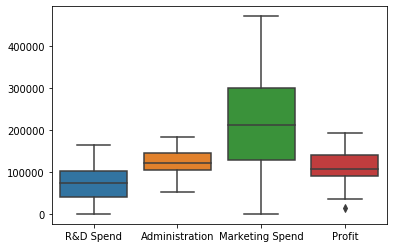

In [4]:
sns.boxplot(data=startup_data)
plt.show()

#### Separating out features & labels

In [5]:
# for numerical columns
x_values = startup_data.loc[:,['R&D Spend', 'Administration', 'Marketing Spend']].values
y_values = startup_data['Profit'].values

#### One hot encoding using sklearn

In [6]:
categorical_cols = ['State']
one_hot_encode = OneHotEncoder()

new_columns = one_hot_encode.fit_transform(startup_data.loc[:,categorical_cols]).toarray()
x_values = np.append(x_values,new_columns, axis=1)

#### Splitting dataset into train set & test set

In [7]:
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size= 0.7, random_state=1)

### Building multi linear regression model

In [8]:
regressor = LinearRegression()
regressor.fit(train_x_values, train_y_values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# printing paramater/coefficient for each feature column
regressor.coef_

array([ 7.70711613e-01, -1.41653527e-02,  3.50988115e-02,  4.21046246e+02,
       -5.35781864e+02,  1.14735618e+02])

#### Storing predictions for train set & test set

In [10]:
train_prediction = regressor.predict(train_x_values)
test_prediction = regressor.predict(test_x_values)

#### Calculating errors

In [11]:
mean_abs_error = metrics.mean_absolute_error(test_y_values, test_prediction)
mean_abs_error

7229.516119295067

In [12]:
mean_sqr_error = metrics.mean_squared_error(test_y_values, test_prediction)
mean_sqr_error

74598131.69485351

In [13]:
root_mean_sqr_error = np.sqrt(mean_sqr_error)
root_mean_sqr_error

8637.02099655046

### Evaluating model against test set

In [14]:
print(f'r2_score: {regressor.score(test_x_values, test_y_values)}')

r2_score: 0.9529676095424044


In [15]:
accuracy_test = accuracy_regression(test_prediction, test_y_values)       # accuracy using absolute error
accuracy_test

91.0867199187651